In [22]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import numpy as np
import pickle


import os
for dirname, _, filenames in os.walk('/kaggle/input/text-file'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/text-file/Pride_Prejudice.txt


In [23]:
file = open('/kaggle/input/text-file/Pride_Prejudice.txt','r',encoding='utf8')

In [24]:
line = []

#Store file in list
for i in file:
    line.append(i)


In [25]:
#convert list to string
data = ' '
for i in line:
    data = ' '.join(line)

In [26]:
# replace unnecessary stuff from text
# new line , carraige return, unicode
data = data.replace('\n',' ').replace('r','').replace('\ufeff',' ').replace('""','').replace('""','')

data = data.split()
data = ' '.join(data)

data[:500]


'The Poject Gutenbeg eBook of Pide and Pejudice This ebook is fo the use of anyone anywhee in the United States and most othe pats of the wold at no cost and with almost no estictions whatsoeve. You may copy it, give it away o e-use it unde the tems of the Poject Gutenbeg License included with this ebook o online at www.gutenbeg.og. If you ae not located in the United States, you will have to check the laws of the county whee you ae located befoe using this eBook. Title: Pide and Pejudice Autho: '

In [27]:
len(data)

702597

In [28]:
# Apply tokenization

token = Tokenizer()
token.fit_on_texts([data])

# saving the tokenizor for predict function
pickle.dump(token, open('token.pkl','wb'))

seq_data = token.texts_to_sequences([data])[0]
seq_data[:15]

[1, 193, 491, 1021, 3, 313, 4, 1148, 42, 1021, 23, 21, 1, 460, 3]

In [29]:
len(seq_data)

132956

In [30]:
vocab_size = len(token.word_index) + 1
vocab_size

7525

In [31]:
seq = []
for i in range(3,len(seq_data)):
    word = seq_data[i-3:i+1]
    seq.append(word)

print('the length of sequence:',len(seq))
seq = np.array(seq)
print(seq)

the length of sequence: 132953
[[   1  193  491 1021]
 [ 193  491 1021    3]
 [ 491 1021    3  313]
 ...
 [7524    2  227  127]
 [   2  227  127  571]
 [ 227  127  571 1788]]


In [34]:
# Make feature  and target variable
X = []
Y = []

for i in seq:
    X.append(i[0:3])
    Y.append(i[3])
    
X = np.array(X)
y = np.array(Y)


In [35]:
print('5 feature vlaues :',X[:5])
print('5 Target values :',Y[:5])

5 feature vlaues : [[   1  193  491]
 [ 193  491 1021]
 [ 491 1021    3]
 [1021    3  313]
 [   3  313    4]]
5 Target values : [1021, 3, 313, 4, 1148]


In [36]:
y = to_categorical(y,num_classes = vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [37]:
model = Sequential()
model.add(Embedding(vocab_size,10, input_length=3))
model.add(LSTM(1000,return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000,activation ='relu'))
model.add(Dense(vocab_size,activation='softmax'))

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 3, 10)             75250     
                                                                 
 lstm_2 (LSTM)               (None, 3, 1000)           4044000   
                                                                 
 lstm_3 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense_2 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_3 (Dense)             (None, 7525)              7532525   
                                                                 
Total params: 20,656,775
Trainable params: 20,656,775
Non-trainable params: 0
_________________________________________________________________


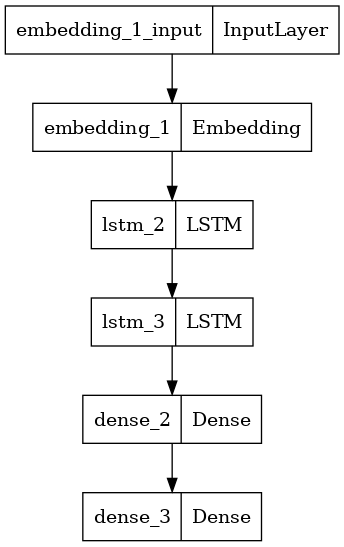

In [39]:
from tensorflow import keras
from keras.utils.vis_utils import plot_model

keras.utils.plot_model(model, to_file=' plot.png',show_layer_names = True)


In [40]:
#from keras import optimizers
from tensorflow.keras.callbacks import ModelCheckpoint

check_point = ModelCheckpoint('next_words.h5',monitor ='loss',verbose=1,save_best_only = True,metrics=['accuracy'])
model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.001))
model.fit(X,y, epochs=10, batch_size=10, callbacks=[check_point])

Epoch 1/10
13296/13296 [==============================] - ETA: 0s - loss: 6.2539
Epoch 1: loss improved from inf to 6.25388, saving model to next_words.h5
13296/13296 [==============================] - 124s 9ms/step - loss: 6.2539
Epoch 2/10
13291/13296 [============================>.] - ETA: 0s - loss: 5.7898
Epoch 2: loss improved from 6.25388 to 5.78974, saving model to next_words.h5
13296/13296 [==============================] - 115s 9ms/step - loss: 5.7897
Epoch 3/10
13296/13296 [==============================] - ETA: 0s - loss: 5.5459
Epoch 3: loss improved from 5.78974 to 5.54590, saving model to next_words.h5
13296/13296 [==============================] - 115s 9ms/step - loss: 5.5459
Epoch 4/10
13291/13296 [============================>.] - ETA: 0s - loss: 5.3687
Epoch 4: loss improved from 5.54590 to 5.36862, saving model to next_words.h5
13296/13296 [==============================] - 115s 9ms/step - loss: 5.3686
Epoch 5/10
13292/13296 [============================>.] - ETA: 0

In [41]:
model.save('next_words.h5')

In [42]:
from tensorflow.keras.models import load_model
import numpy as np
import pickle

model = load_model('next_words.h5')
token = pickle.load(open('token.pkl','rb'))



In [43]:
def predict_next_word(model,token,text):
    seqs =token.texts_to_sequences([text])
    seqs = np.array(seqs)
    pred = np.argmax(model.predict(seqs))
    predicted_word = ' '

 
    for key, value in token.word_index.items():
        if value == pred:
            predicted_word = key
            break
    print(predicted_word)
    return predicted_word


In [ ]:
# let's check the system by taking input from user

while(True):
    text = input('Enter any text line:')

    if text == '0':
        print(" Execution Completed.........")
        break
    else:
        try:
            text = text.split(' ')
            text = text[-3:]

            print(text)

            predict_next_word(model, token, text)

        except Exception as e:
            print("Error occured: ",e)
            continue



Enter any text line: The Project Gutenberg eBook of


['Gutenberg', 'eBook', 'of']
1/1 [==============================] - 1s 693ms/step
the


Enter any text line: Gutenberg eBook of 


['eBook', 'of', '']
1/1 [==============================] - 1s 663ms/step
the
